## Import of libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
credit_risk = pd.read_csv('databases/credit_risk_dataset.csv')

## Visualizing data

In [3]:
credit_risk

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [4]:
credit_risk.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


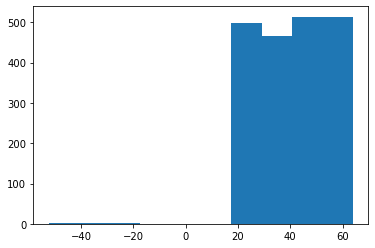

In [5]:
plt.hist(x = credit_risk['age']);

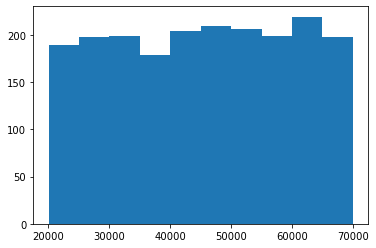

In [6]:
plt.hist(x = credit_risk['income']);

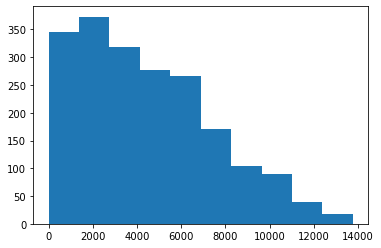

In [7]:
plt.hist(x = credit_risk['loan']);

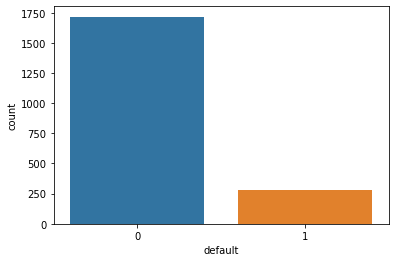

In [8]:
sns.countplot(x = 'default', data = credit_risk);

## Changing wrong or non-existent values

In [9]:
credit_risk.loc[credit_risk['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [10]:
credit_risk.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [11]:
credit_risk.loc[credit_risk['age'] < 0, 'age'] = 40.807559

In [12]:
credit_risk.loc[credit_risk['age'] < 0]

,clientid,income,age,loan,default


In [13]:
credit_risk.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [14]:
credit_risk['age'].loc[pd.isnull]

28   NaN
30   NaN
31   NaN
Name: age, dtype: float64

In [15]:
credit_risk['age'].loc[pd.isnull] = 40.807559

/home/andre/miniconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
credit_risk.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

In [17]:
credit_risk.head(32)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


## Dividing predictors and class

In [18]:
x = credit_risk.iloc[:, 1:4].values
x

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [19]:
y = credit_risk.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 0, 0])

## Tranforming the values with standard scaler

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
standard_scaler = StandardScaler()

x = standard_scaler.fit_transform(x)

In [22]:
x

array([[ 1.45393393,  1.36540709,  1.20281942],
       [-0.76217555,  0.54268646,  0.69642695],
       [ 0.83682073,  1.67419801,  1.17471147],
       ...,
       [-0.07122592, -0.97445874,  0.35420081],
       [-0.11000289,  1.73939351, -0.92675625],
       [ 1.682986  ,  1.14920258,  0.96381038]])

## Dividing the base between train and test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.25, random_state = 0)

In [26]:
x_train

array([[ 1.15633445, -1.64149438,  0.52347354],
       [ 1.33607095,  1.69627888, -1.28842259],
       [-1.33869748, -1.36621678, -0.70568343],
       ...,
       [ 0.21738243, -0.14701769,  1.40872498],
       [ 0.58716195,  0.66438118,  0.67948086],
       [ 0.68315357,  0.04087579,  1.91819744]])

In [27]:
x_test

array([[ 1.59301567, -1.35433196,  2.58262733],
       [ 0.99769755,  0.99809193,  0.84418709],
       [-0.42485257,  0.55815249, -1.15785286],
       ...,
       [ 1.63591661, -1.50477483, -0.54115191],
       [-1.63024494, -0.45377193, -0.05885605],
       [-0.41442961, -0.34395206,  1.02261511]])

## Using neural networks to predict if the customer will or not pay the loan

In [562]:
from sklearn.neural_network import MLPClassifier

In [563]:
x_train

(500, 3)

In [564]:
y_train

(500,)

In [691]:
neural_network = MLPClassifier(max_iter=1750, verbose=True, solver= 'adam', activation='tanh', hidden_layer_sizes=(25, 25))
neural_network.fit(x_train, y_train)

Iteration 1, loss = 0.78949790
Iteration 2, loss = 0.72848904
Iteration 3, loss = 0.67141889
Iteration 4, loss = 0.62019249
Iteration 5, loss = 0.57429175
Iteration 6, loss = 0.53189831
Iteration 7, loss = 0.49514688
Iteration 8, loss = 0.46332580
Iteration 9, loss = 0.43449419
Iteration 10, loss = 0.40954889
Iteration 11, loss = 0.38802828
Iteration 12, loss = 0.36871407
Iteration 13, loss = 0.35184098
Iteration 14, loss = 0.33699656
Iteration 15, loss = 0.32377039
Iteration 16, loss = 0.31167554
Iteration 17, loss = 0.30092024
Iteration 18, loss = 0.29106664
Iteration 19, loss = 0.28201824
Iteration 20, loss = 0.27340373
Iteration 21, loss = 0.26556924
Iteration 22, loss = 0.25830529
Iteration 23, loss = 0.25145878
Iteration 24, loss = 0.24485821
Iteration 25, loss = 0.23894384
Iteration 26, loss = 0.23303418
Iteration 27, loss = 0.22756761
Iteration 28, loss = 0.22235312
Iteration 29, loss = 0.21741940
Iteration 30, loss = 0.21267263
Iteration 31, loss = 0.20817169
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(25, 25), max_iter=1750,
              verbose=True)

In [692]:
predictions = neural_network.predict(x_test)

In [693]:
predictions

array([1, 0, 0, ..., 0, 1, 0])

In [694]:
from sklearn.metrics import accuracy_score

In [837]:
float("{:.2f}".format(accuracy_score(y_test, predictions) * 100))

99.67

/home/andre/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


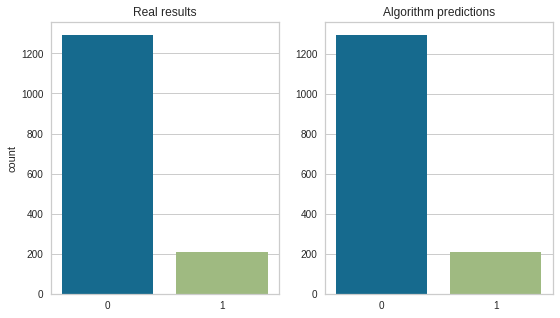

In [876]:
fig, ax = plt.subplots(1,2, figsize=(9,5));
sns.countplot(x = y_test, ax=ax[0]).set_title('Real results');
sns.countplot(x = predictions, ax=ax[1]).set_title('Algorithm predictions');
plt.ylabel(' ')
fig.show();

In [922]:
from sklearn.metrics import classification_report

In [923]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1292
           1       0.99      0.99      0.99       208

    accuracy                           1.00      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       1.00      1.00      1.00      1500



In [939]:
import pickle

In [940]:
pickle.dump(neural_network, open('neural_network_creditrisk.sav', 'wb'))